# Classification Model on Immigrants Death Dataset


This data is sourced from the International Organization for Migration. The data is part of a specific project called the Missing Migrants Project which tracks deaths of migrants, including refugees , who have gone missing along mixed migration routes worldwide. The research behind this project began with the October 2013 tragedies, when at least 368 individuals died in two shipwrecks near the Italian island of Lampedusa. Since then, Missing Migrants Project has developed into an important hub and advocacy source of information that media, researchers, and the general public access for the latest information.

**Columns

    Web ID:ID
    Region of Incident:The region of Incident
    Reported Date:The reported date of incident
    Reported Year:Year
    Reported Month:Month
    Number Dead:Total Dead Migrants
    Minimum Estimated Number of Missing:Total Missing Migrants
    Total Dead and Missing:Total Dead and Missing MIgrants
    Number of Survivors:How many people survived
    Number of Females:Number of females
    Number of Males:number of males
    Number of Children:number of children
    Cause of Death:The cause of death
    Location Description:Where the incident happened
    Information Source:Information Source
    Location Coordinates:Location Coordinate
    Migration Route:Migration Route
    URL:Url sites for info
    UNSD Geographical Grouping:UnSD Geographical
    Source Quality:source reliability

Dataset Link:
https://www.kaggle.com/snocco/missing-migrants-project

Included:
1. Data Exploration
2. Data Preprocessing
3. Data Visualization
4. Feature Selection
5. Models
    a. KNN: Simple Model, KNN using Grid Search, KNN using RepeatedStratifiedKFold for Cross Validation 
    b. Logistic Classification: Grid Search, using RepeatedStratifiedKFold for Cross Validation
    c. Decision Tree: Grid Search, using RepeatedStratifiedKFold for Cross Validation
    d. SVC without Kernel: Grid Search, Cross Validation
    e. SVC with Kernel: Grid Search, Cross Validation


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from warnings import simplefilter
import warnings
warnings.filterwarnings('always') 
simplefilter(action='ignore', category=FutureWarning)

Importing Dataset

In [2]:
df=pd.read_csv('MissingMigrants-Global-2019-03-29T18-36-07.csv')

In [3]:
df.head(5)

Web ID Region of Incident   Reported Date  Reported Year Reported Month  \
0   51591      Mediterranean  March 28, 2019           2019            Mar   
1   51588      Mediterranean  March 26, 2019           2019            Mar   
2   51589      Mediterranean  March 26, 2019           2019            Mar   
3   51590      Mediterranean  March 26, 2019           2019            Mar   
4   51587    Central America  March 25, 2019           2019            Mar   

   Number Dead  Minimum Estimated Number of Missing  Total Dead and Missing  \
0          NaN                                  2.0                       2   
1          4.0                                  NaN                       4   
2          1.0                                  NaN                       1   
3          1.0                                  NaN                       1   
4          1.0                                  NaN                       1   

   Number of Survivors  Number of Females  Number of Males  \
0                 36.0                NaN              2.0   
1                 11.0                3.0              NaN   
2                  NaN                NaN              NaN   
3                  NaN                NaN              NaN   
4                  NaN                NaN              1.0   

   Number of Children     Cause of Death  \
0                 NaN  Presumed drowning   
1                 1.0  Presumed drowning   
2                 NaN  Presumed drowning   
3                 NaN  Presumed drowning   
4                 NaN    Fall from train   

                                Location Description  \
0                     Off the coast of Chios, Greece   
1  Off the coast of Ayvacık district, Çanakkale p...   
2  Body recovered on Playa del Tarajal, Ceuta, Sp...   
3  Body recovered on beach near Tetouan, Morocco ...   
4         Train tracks in Teacalco, Tlaxcala, Mexico   

                    Information Source               Location Coordinates  \
0  Hellenic Coast Guard via IOM Greece   38.362368696592, 26.172509473654   
1   Turkish Coast Guard via IOM Turkey   39.441975591614, 26.378816195919   
2     Ceuta al día, El Pueblo de Ceuta   35.871901875921, -5.343037665842   
3                   El Pueblo de Ceuta   35.635115912988, -5.275650103548   
4      Megalópolis, Línea de contraste  19.334475177429, -98.069823987538   

         Migration Route                                           URL  \
0  Eastern Mediterranean                                           NaN   
1  Eastern Mediterranean                         http://bit.ly/2YmiPAN   
2  Western Mediterranean  http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC   
3  Western Mediterranean                         http://bit.ly/2uwj5zC   
4                    NaN  http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS   

  UNSD Geographical Grouping  Source Quality  
0              Uncategorized               5  
1              Uncategorized               5  
2              Uncategorized               3  
3              Uncategorized               1  
4            Central America               3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 20 columns):
Web ID                                 5333 non-null int64
Region of Incident                     5333 non-null object
Reported Date                          5333 non-null object
Reported Year                          5333 non-null int64
Reported Month                         5333 non-null object
Number Dead                            5142 non-null float64
Minimum Estimated Number of Missing    503 non-null float64
Total Dead and Missing                 5333 non-null int64
Number of Survivors                    749 non-null float64
Number of Females                      897 non-null float64
Number of Males                        2813 non-null float64
Number of Children                     644 non-null float64
Cause of Death                         5333 non-null object
Location Description                   5323 non-null object
Information Source                     5331 non-null o

In [5]:
df.describe()

Web ID  Reported Year  Number Dead  \
count   5333.000000    5333.000000  5142.000000   
mean   43247.885805    2016.656104     3.287631   
std     5186.837212       1.237033    13.593407   
min    30158.000000    2014.000000     0.000000   
25%    40876.000000    2016.000000     1.000000   
50%    43504.000000    2017.000000     1.000000   
75%    45747.000000    2018.000000     2.000000   
max    51592.000000    2019.000000   750.000000   

       Minimum Estimated Number of Missing  Total Dead and Missing  \
count                           503.000000             5333.000000   
mean                             29.119284                5.916370   
std                              67.913216               28.051811   
min                               0.000000                0.000000   
25%                               2.000000                1.000000   
50%                               7.000000                1.000000   
75%                              25.000000                3.000000   
max                             750.000000             1022.000000   

       Number of Survivors  Number of Females  Number of Males  \
count           749.000000         897.000000      2813.000000   
mean             63.607477           2.012263         1.890864   
std             146.520155           2.990100         5.510674   
min               0.000000           0.000000         0.000000   
25%               5.000000           1.000000         1.000000   
50%              15.000000           1.000000         1.000000   
75%              61.000000           2.000000         1.000000   
max            1950.000000          30.000000       135.000000   

       Number of Children  Source Quality  
count          644.000000     5333.000000  
mean             2.476708        2.895556  
std             10.216220        1.423257  
min              0.000000        1.000000  
25%              1.000000        2.000000  
50%              1.000000        2.000000  
75%              2.000000        4.000000  
max            250.000000        5.000000

**Target variable is Region of Incident

In [6]:
df["Region of Incident"].unique()

array(['Mediterranean', 'Central America', 'US-Mexico Border',
       'Southeast Asia', 'North Africa', 'Caribbean', 'Europe',
       'South America', 'Middle East', 'Horn of Africa',
       'Sub-Saharan Africa', 'South Asia', 'East Asia', 'Central Asia',
       'North America'], dtype=object)

Plotting the vout of Incident by Region

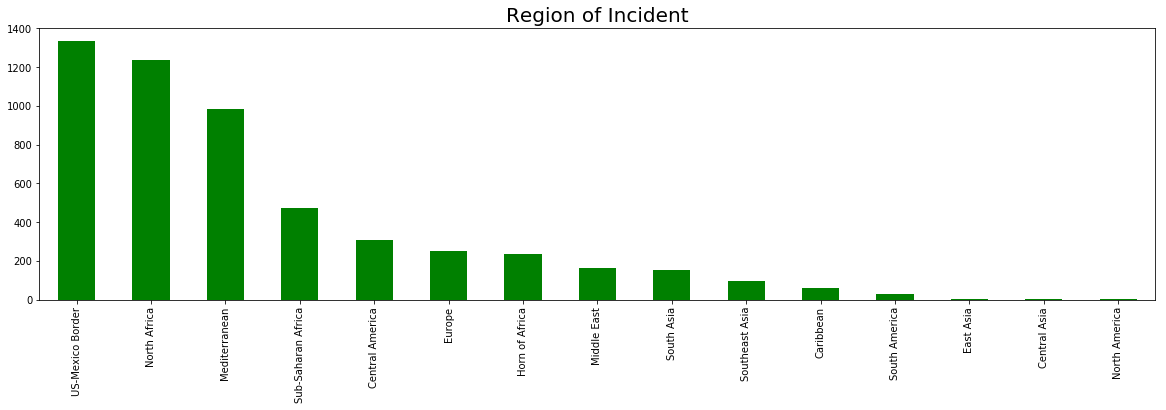

In [7]:
fig = plt.figure(figsize=(20, 5)) 
df['Region of Incident'].value_counts().plot(kind='bar', color='g',align='center')
plt.title('Region of Incident', fontsize=20)
plt.show()

Getting the Latitude and Longitude from location Cordinates
Using these cordinates, plotting the incident counts on world map which will provide a better view of the regions where most of the mishaps happen with immigrates

In [8]:
df['Lat'], df['Lon'] = df['Location Coordinates'].str.split(', ').str

In [9]:
count = df['Lat'].count()
latList = []
for i in range(1,count+1):
    lat = float(df['Lat'][i])
    latList.append(df['Lat'][i])

#print(latList)

In [10]:
count = df['Lon'].count()
lonList = []
for i in range(1,count+1):
    lon = float(df['Lon'][i])
    lonList.append(lon)

#print(lonList)

Visualizing deaths of Immigrants by region on world map

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


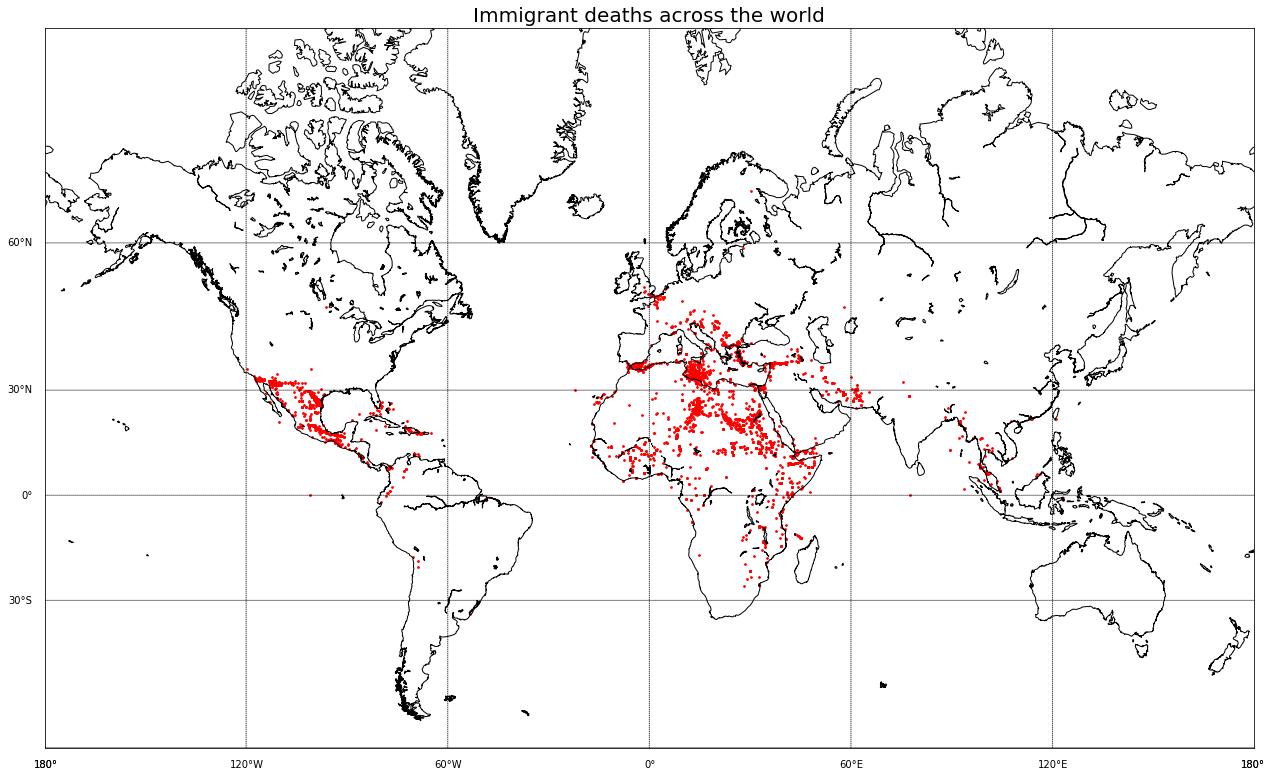

In [11]:
#lat = df['Lat'][:]
from mpl_toolkits.basemap import Basemap
#lon = df['Lon'][:]
lat = np.array(latList)
lon = np.array(lonList)
#lon = lon.dropna()
#lat = lat.dropna()
print(type(lat))
print(type(lon))

fig=plt.figure()
ax=fig.add_axes([1.0,1.0,2.8,2.8])
mapp = Basemap(llcrnrlon=-180.,llcrnrlat=-60.,urcrnrlon=180.,urcrnrlat=80.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
mapp.drawcoastlines()
mapp.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
mapp.drawmeridians(np.arange(mapp.lonmin,mapp.lonmax+30,60),labels=[0,0,0,1])
x, y = mapp(lon,lat)
mapp.scatter(x,y,3,marker='o',color='r')
ax.set_title('Immigrant deaths across the world', fontsize=20)
plt.show()

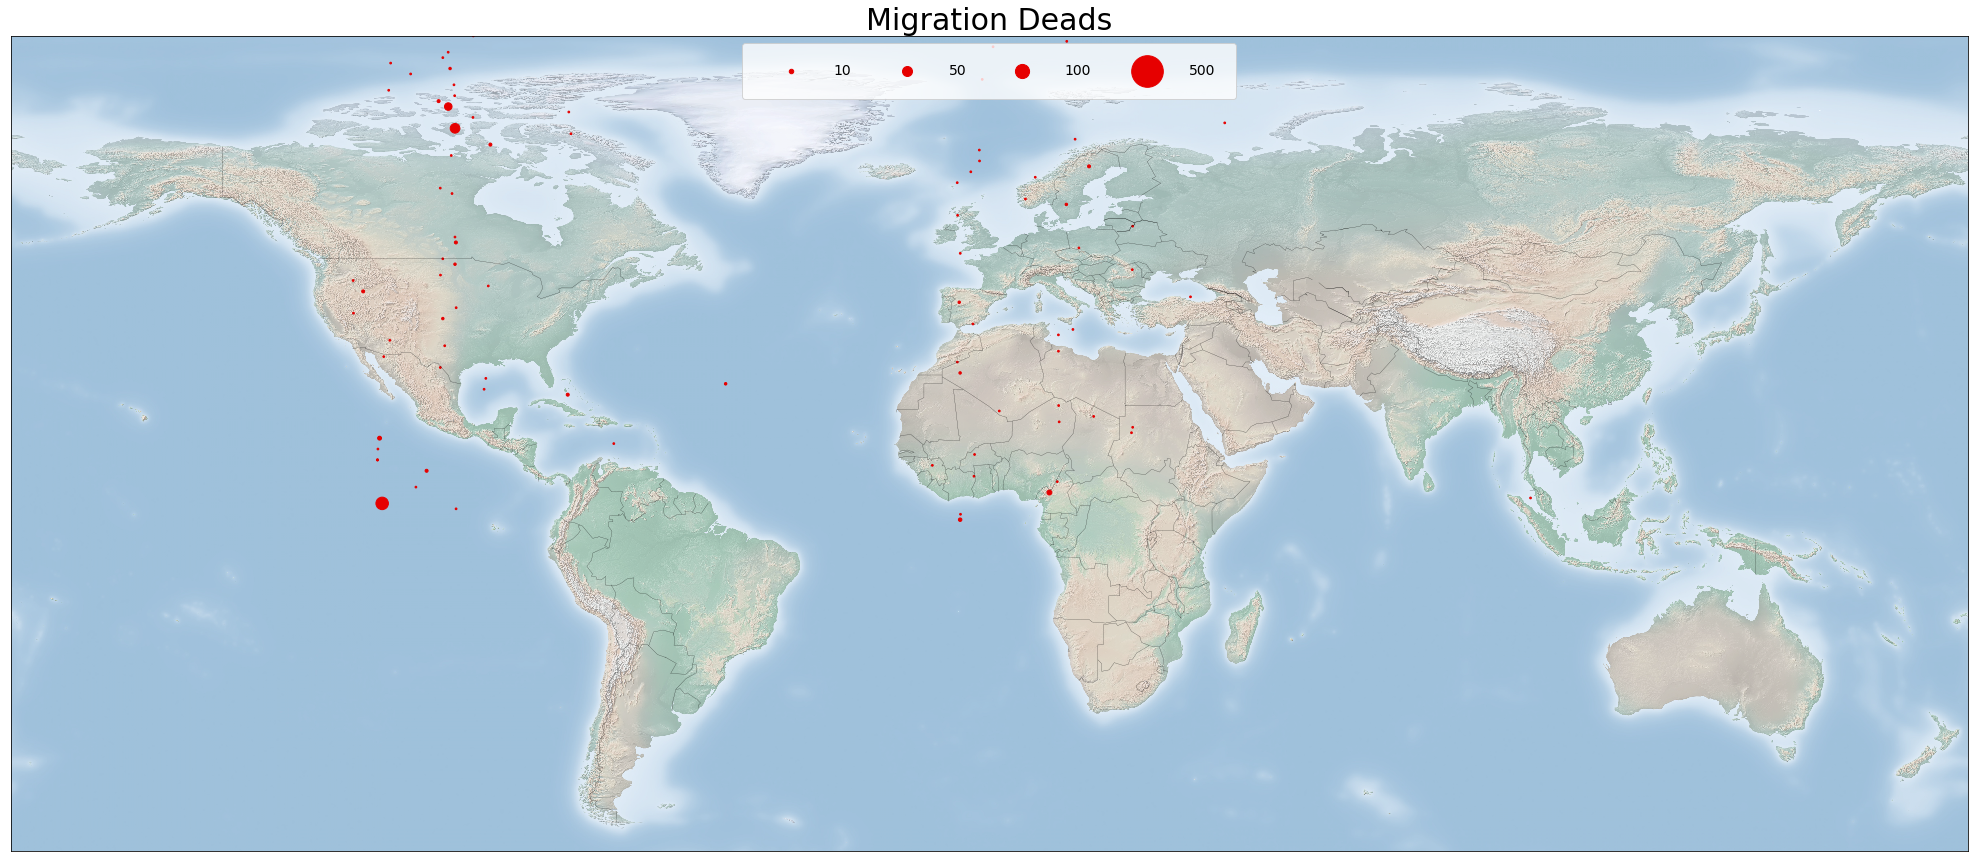

In [12]:
%matplotlib inline
warnings.filterwarnings("ignore")
plt.figure(figsize=(40,15))
# A basic map
m=Basemap(llcrnrlat=-60,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
m.drawcountries(linewidth=0.2, color="black")
m.shadedrelief(alpha=0.7)
x, y = m(lon, lat)
s1 = df['Number Dead']

l1 = plt.scatter([],[], s=20, color="#e60000")
l2 = plt.scatter([],[], s=100, color="#e60000")
l3 = plt.scatter([],[], s=200, color="#e60000")
l4 = plt.scatter([],[], s=1000, color="#e60000")

labels = ["10", "50", "100", "500"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=14,
handlelength=4, loc = 9, borderpad = 1.5,
handletextpad=1, scatterpoints = 1)

m.scatter(x, y, latlon=True, s=s1*3, marker="o", alpha=1, c="#e60000")
plt.title('Migration Deads',size=30)
plt.show()

## Handling missing variables

Find out missing variables

In [13]:
def missingData(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    md = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    md = md[md["Percent"] > 0]
    plt.figure(figsize = (8, 4))
    plt.xticks(rotation='90')
    sns.barplot(md.index, md["Percent"],color="g",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return md

Total    Percent
Minimum Estimated Number of Missing   4830  90.568161
Number of Children                    4689  87.924245
Number of Survivors                   4584  85.955372
Number of Females                     4436  83.180199
Migration Route                       2673  50.121883
Number of Males                       2520  47.252953
URL                                   2141  40.146259
Number Dead                            191   3.581474
UNSD Geographical Grouping              11   0.206263
Location Description                    10   0.187512
Information Source                       2   0.037502
Lon                                      1   0.018751
Lat                                      1   0.018751
Location Coordinates                     1   0.018751

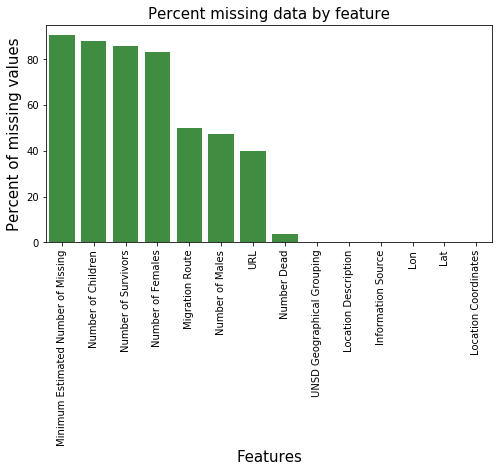

In [14]:
%matplotlib inline
missingData(df)

In [15]:
df['Minimum Estimated Number of Missing'] = df['Minimum Estimated Number of Missing'].fillna(df['Minimum Estimated Number of Missing'].median())
df['Number of Survivors'] = df['Number of Survivors'].fillna(df['Number of Survivors'].median())
df['Number of Females'] = df['Number of Females'].fillna(df['Number of Females'].median())
df['Number of Males'] = df['Number of Males'].fillna(df['Number of Males'].median())
df['Number of Children'] = df['Number of Children'].fillna(df['Number of Children'].median())
df['Number Dead'] = df['Number Dead'].fillna(df['Number Dead'].median())

Total    Percent
Migration Route              2673  50.121883
URL                          2141  40.146259
UNSD Geographical Grouping     11   0.206263
Location Description           10   0.187512
Information Source              2   0.037502
Lon                             1   0.018751
Location Coordinates            1   0.018751
Lat                             1   0.018751

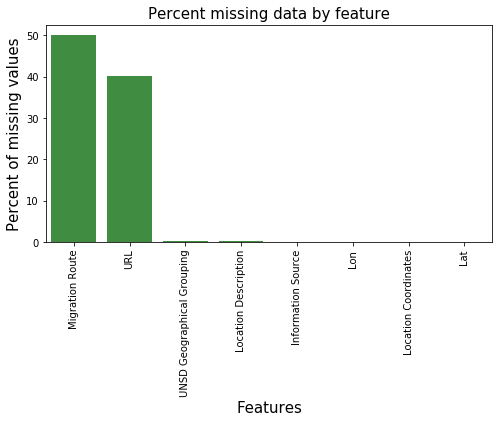

In [16]:
%matplotlib inline
missingData(df)

In [17]:
# Dropping URL as not Important
df.drop(['URL','Lat','Lon'], inplace = True, axis = 1)

In [18]:
df['Migration Route'].unique()

array(['Eastern Mediterranean', 'Western Mediterranean', nan,
       'Central Mediterranean', 'Western African', 'Western Balkans',
       'Italy to France', 'Horn Africa to Yemen', 'Central America to US',
       'Calais to United Kingdom', 'Darien Gap',
       'Dominican Republic to Puerto Rico', 'Malaysia to Indonesia',
       'From Haiti to Dajabon, Dominican Republic',
       'Caribbean to Central America', 'Venezuela to Curaçao'],
      dtype=object)

In [19]:
df.isnull().sum(axis = 0)

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                               0
Minimum Estimated Number of Missing       0
Total Dead and Missing                    0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Location Description                     10
Information Source                        2
Location Coordinates                      1
Migration Route                        2673
UNSD Geographical Grouping               11
Source Quality                            0
dtype: int64

In [20]:
#Dropping Migration Route as 50% data is missing
df.drop('Migration Route', inplace = True, axis =1)

In [21]:
df.shape

(5333, 18)

In [22]:
#dropping rows with missing values as they are very few,will loose only 23 rows.
df = df.dropna()

In [23]:
df.isnull().sum(axis = 0)

Web ID                                 0
Region of Incident                     0
Reported Date                          0
Reported Year                          0
Reported Month                         0
Number Dead                            0
Minimum Estimated Number of Missing    0
Total Dead and Missing                 0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Cause of Death                         0
Location Description                   0
Information Source                     0
Location Coordinates                   0
UNSD Geographical Grouping             0
Source Quality                         0
dtype: int64

In [24]:
df.shape

(5310, 18)

Get only reported month and year

In [25]:
import datetime
def get_month(s):
    new_s = datetime.datetime.strptime(s, '%B %d, %Y').month
    return new_s

In [26]:
df['Reported Month'] = df['Reported Date'].apply(get_month)

In [27]:
#Dropping Reported Date
df.drop('Reported Date', inplace = True, axis =1)
df.head(2)

Web ID Region of Incident  Reported Year  Reported Month  Number Dead  \
0   51591      Mediterranean           2019               3          1.0   
1   51588      Mediterranean           2019               3          4.0   

   Minimum Estimated Number of Missing  Total Dead and Missing  \
0                                  2.0                       2   
1                                  7.0                       4   

   Number of Survivors  Number of Females  Number of Males  \
0                 36.0                1.0              2.0   
1                 11.0                3.0              1.0   

   Number of Children     Cause of Death  \
0                 1.0  Presumed drowning   
1                 1.0  Presumed drowning   

                                Location Description  \
0                     Off the coast of Chios, Greece   
1  Off the coast of Ayvacık district, Çanakkale p...   

                    Information Source              Location Coordinates  \
0  Hellenic Coast Guard via IOM Greece  38.362368696592, 26.172509473654   
1   Turkish Coast Guard via IOM Turkey  39.441975591614, 26.378816195919   

  UNSD Geographical Grouping  Source Quality  
0              Uncategorized               5  
1              Uncategorized               5

In [28]:
len(df['Cause of Death'].unique())

233

as there are too many Cause of Deaths- for simplification we are grouping all similar causes into one
for example Sickness, Diabetic, heart attck are all causes due to health conditions.
so grouping then into one variable name Health Condition

In [29]:
def deathCauseReplacement(data):
    #HEALTH CONDITION
    data.loc[data['Cause of Death'].str.contains('Sickness|sickness'), 'Cause of Death'] = 'Health Condition'
    data.loc[data['Cause of Death'].str.contains('diabetic|heart attack|meningitis|virus|cancer|bleeding|insuline|inhalation'), 'Cause of Death'] = 'Health Condition'
    data.loc[data['Cause of Death'].str.contains('Organ|Coronary|Envenomation|Post-partum|Respiratory|Hypoglycemia'), 'Cause of Death'] = 'Health Condition'
    #HARSH CONDITIONS
    data.loc[data['Cause of Death'].str.contains('harsh weather|Harsh weather'), 'Cause of Death'] = 'Harsh conditions'
    data.loc[data['Cause of Death'].str.contains('Harsh conditions|harsh conditions'), 'Cause of Death'] = 'Harsh conditions'
    data.loc[data['Cause of Death'].str.contains('Exhaustion|Heat stroke'), 'Cause of Death'] = 'Harsh conditions'
    #UNKNOWN
    data.loc[data['Cause of Death'].str.contains('Unknown|unknown'), 'Cause of Death'] = 'Unknown'
    #STARVATION
    data.loc[data['Cause of Death'].str.contains('Starvation|starvation'), 'Cause of Death'] = 'Starvation'
    #DEHYDRATION
    data.loc[data['Cause of Death'].str.contains('dehydration|Dehydration'), 'Cause of Death'] = 'Dehydration'
    #DROWNING
    data.loc[data['Cause of Death'].str.contains('Drowning|drowning|Pulmonary|respiratory|lung|bronchial|pneumonia|Pneumonia'), 'Cause of Death'] = 'Drowning'
    #HYPERTHERMIA
    data.loc[data['Cause of Death'].str.contains('hyperthermia|Hyperthermia'), 'Cause of Death'] = 'Hyperthermia'
    #HYPOTHERMIA
    data.loc[data['Cause of Death'].str.contains('hypothermia|Hypothermia'), 'Cause of Death'] = 'Hypothermia'
    #ASPHYXIATION
    data.loc[data['Cause of Death'].str.contains('asphyxiation|suffocation'), 'Cause of Death'] = 'Asphyxiation'
    #VEHICLE ACCIDENT
    data.loc[data['Cause of Death'].str.contains('train|bus|vehicle|truck|boat|car|road|van|plane'), 'Cause of Death'] = 'Vehicle Accident'
    data.loc[data['Cause of Death'].str.contains('Train|Bus|Vehicle|Truck|Boat|Car|Road|Van|Plane'), 'Cause of Death'] = 'Vehicle Accident'
    #MURDER
    data.loc[data['Cause of Death'].str.contains('murder|stab|shot|violent|blunt force|violence|beat-up|fight|murdered|death'), 'Cause of Death'] = 'Murder'
    data.loc[data['Cause of Death'].str.contains('Murder|Stab|Shot|Violent|Blunt force|Violence|Beat-up|Fight|Murdered|Death'), 'Cause of Death'] = 'Murder'
    data.loc[data['Cause of Death'].str.contains('Hanging|Apache|mortar|landmine|Rape|Gassed'), 'Cause of Death'] = 'Murder'
    #CRUSHED
    data.loc[data['Cause of Death'].str.contains('crushed to death|crush|Crush|Rockslide'), 'Cause of Death'] = 'Crushed'
    #BURNED
    data.loc[data['Cause of Death'].str.contains('burn|burns|burned|fire'), 'Cause of Death'] = 'Burned'
    data.loc[data['Cause of Death'].str.contains('Burn|Burns|Burned|Fire'), 'Cause of Death'] = 'Burned'
    #ELECTROCUTION
    data.loc[data['Cause of Death'].str.contains('electrocution|Electrocution'), 'Cause of Death'] = 'Electrocution' 
    #FALLEN
    data.loc[data['Cause of Death'].str.contains('Fall|fall'), 'Cause of Death'] = 'Fallen' 
    #KILLED BY ANIMALS
    data.loc[data['Cause of Death'].str.contains('crocodile|hippopotamus|hippoptamus'), 'Cause of Death'] = 'Killed by animals'
    #EXPOSURE
    data.loc[data['Cause of Death'].str.contains('exposure|Exposure'), 'Cause of Death'] = 'Exposure'

In [30]:
deathCauseReplacement(df)

In [31]:
(df['Cause of Death'].unique())

array(['Drowning', 'Vehicle Accident', 'Unknown', 'Murder',
       'Electrocution', 'Suffocation', 'Hypothermia', 'Burned',
       'Dehydration', 'Health Condition', 'Fallen', 'Starvation',
       'Harsh conditions', 'Hyperthermia', 'Killed by animals',
       'Exposure', 'Crushed', 'Mixed', 'Asphyxiation', 'Suicide'],
      dtype=object)

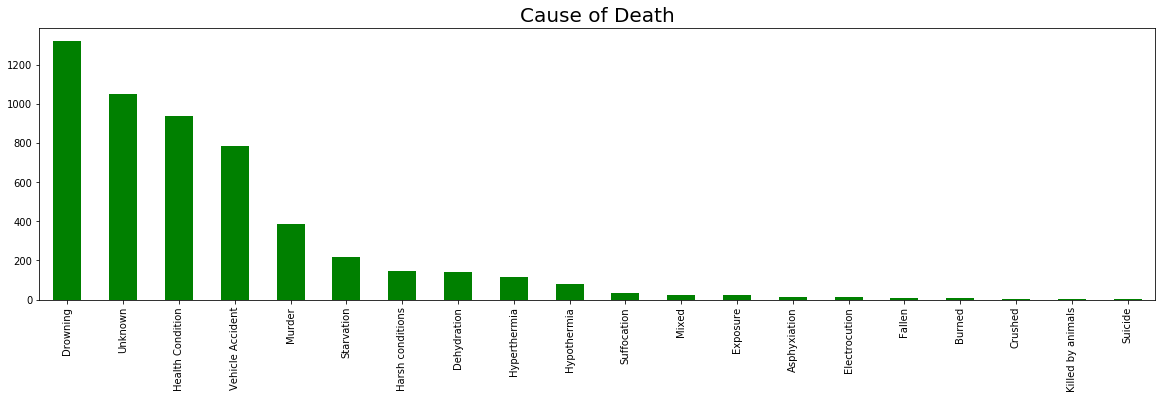

In [32]:
%matplotlib inline
fig = plt.figure(figsize=(20, 5)) 
df['Cause of Death'].value_counts().plot(kind='bar', color='g',align='center')
plt.title('Cause of Death', fontsize=20)
plt.show()

In [33]:
df.drop(['Web ID','Information Source','Location Description','UNSD Geographical Grouping'], inplace = True, axis =1)

In [34]:
df.head(2)

Region of Incident  Reported Year  Reported Month  Number Dead  \
0      Mediterranean           2019               3          1.0   
1      Mediterranean           2019               3          4.0   

   Minimum Estimated Number of Missing  Total Dead and Missing  \
0                                  2.0                       2   
1                                  7.0                       4   

   Number of Survivors  Number of Females  Number of Males  \
0                 36.0                1.0              2.0   
1                 11.0                3.0              1.0   

   Number of Children Cause of Death              Location Coordinates  \
0                 1.0       Drowning  38.362368696592, 26.172509473654   
1                 1.0       Drowning  39.441975591614, 26.378816195919   

   Source Quality  
0               5  
1               5

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 0 to 5332
Data columns (total 13 columns):
Region of Incident                     5310 non-null object
Reported Year                          5310 non-null int64
Reported Month                         5310 non-null int64
Number Dead                            5310 non-null float64
Minimum Estimated Number of Missing    5310 non-null float64
Total Dead and Missing                 5310 non-null int64
Number of Survivors                    5310 non-null float64
Number of Females                      5310 non-null float64
Number of Males                        5310 non-null float64
Number of Children                     5310 non-null float64
Cause of Death                         5310 non-null object
Location Coordinates                   5310 non-null object
Source Quality                         5310 non-null int64
dtypes: float64(6), int64(4), object(3)
memory usage: 580.8+ KB


Get Latitude, Longitude from location cordinates and introduce two new columns

In [36]:
df['latitude'], df['longitude'] = df['Location Coordinates'].str.split(', ').str
df['latitude']=pd.to_numeric(df['latitude'])
df['longitude']=pd.to_numeric(df['longitude'])

In [37]:
#Dropping Location Coordinates
df.drop('Location Coordinates', inplace = True, axis =1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 0 to 5332
Data columns (total 14 columns):
Region of Incident                     5310 non-null object
Reported Year                          5310 non-null int64
Reported Month                         5310 non-null int64
Number Dead                            5310 non-null float64
Minimum Estimated Number of Missing    5310 non-null float64
Total Dead and Missing                 5310 non-null int64
Number of Survivors                    5310 non-null float64
Number of Females                      5310 non-null float64
Number of Males                        5310 non-null float64
Number of Children                     5310 non-null float64
Cause of Death                         5310 non-null object
Source Quality                         5310 non-null int64
latitude                               5310 non-null float64
longitude                              5310 non-null float64
dtypes: float64(8), int64(4), object(2)
memory us

Creating dummy variables of Cause of Death

In [39]:
df = pd.get_dummies(data=df, columns=['Cause of Death'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 0 to 5332
Data columns (total 33 columns):
Region of Incident                     5310 non-null object
Reported Year                          5310 non-null int64
Reported Month                         5310 non-null int64
Number Dead                            5310 non-null float64
Minimum Estimated Number of Missing    5310 non-null float64
Total Dead and Missing                 5310 non-null int64
Number of Survivors                    5310 non-null float64
Number of Females                      5310 non-null float64
Number of Males                        5310 non-null float64
Number of Children                     5310 non-null float64
Source Quality                         5310 non-null int64
latitude                               5310 non-null float64
longitude                              5310 non-null float64
Cause of Death_Asphyxiation            5310 non-null uint8
Cause of Death_Burned                  5310 non-nu

In [41]:
df['Region of Incident'].unique()

array(['Mediterranean', 'Central America', 'US-Mexico Border',
       'Southeast Asia', 'North Africa', 'Caribbean', 'Europe',
       'South America', 'Middle East', 'Horn of Africa',
       'Sub-Saharan Africa', 'South Asia', 'East Asia', 'Central Asia',
       'North America'], dtype=object)

Converting Region of Incident classes which are in string, to numeric.

In [42]:
def dummy_region(data):
    data.loc[data['Region of Incident']=='Mediterranean', 'Region of Incident'] = 0
    data.loc[data['Region of Incident']=='Central America', 'Region of Incident'] = 1
    data.loc[data['Region of Incident']=='US-Mexico Border', 'Region of Incident'] = 2
    data.loc[data['Region of Incident']=='Southeast Asia', 'Region of Incident'] = 3
    data.loc[data['Region of Incident']=='North Africa', 'Region of Incident'] = 4
    data.loc[data['Region of Incident']=='Caribbean', 'Region of Incident'] = 5
    data.loc[data['Region of Incident']=='Europe', 'Region of Incident'] = 6
    data.loc[data['Region of Incident']=='South America', 'Region of Incident'] = 7
    data.loc[data['Region of Incident']=='Middle East', 'Region of Incident'] = 8
    data.loc[data['Region of Incident']=='Horn of Africa', 'Region of Incident'] = 9
    data.loc[data['Region of Incident']=='Sub-Saharan Africa', 'Region of Incident'] = 10
    data.loc[data['Region of Incident']=='South Asia', 'Region of Incident'] = 11
    data.loc[data['Region of Incident']=='East Asia', 'Region of Incident'] = 12
    data.loc[data['Region of Incident']=='Central Asia', 'Region of Incident'] = 13
    data.loc[data['Region of Incident']=='North America', 'Region of Incident'] = 14

In [43]:
dummy_region(df)

In [44]:
df.head()

Region of Incident  Reported Year  Reported Month  Number Dead  \
0                   0           2019               3          1.0   
1                   0           2019               3          4.0   
2                   0           2019               3          1.0   
3                   0           2019               3          1.0   
4                   1           2019               3          1.0   

   Minimum Estimated Number of Missing  Total Dead and Missing  \
0                                  2.0                       2   
1                                  7.0                       4   
2                                  7.0                       1   
3                                  7.0                       1   
4                                  7.0                       1   

   Number of Survivors  Number of Females  Number of Males  \
0                 36.0                1.0              2.0   
1                 11.0                3.0              1.0   
2                 15.0                1.0              1.0   
3                 15.0                1.0              1.0   
4                 15.0                1.0              1.0   

   Number of Children  ...  Cause of Death_Hyperthermia  \
0                 1.0  ...                            0   
1                 1.0  ...                            0   
2                 1.0  ...                            0   
3                 1.0  ...                            0   
4                 1.0  ...                            0   

   Cause of Death_Hypothermia  Cause of Death_Killed by animals  \
0                           0                                 0   
1                           0                                 0   
2                           0                                 0   
3                           0                                 0   
4                           0                                 0   

   Cause of Death_Mixed  Cause of Death_Murder  Cause of Death_Starvation  \
0                     0                      0                          0   
1                     0                      0                          0   
2                     0                      0                          0   
3                     0                      0                          0   
4                     0                      0                          0   

   Cause of Death_Suffocation  Cause of Death_Suicide  Cause of Death_Unknown  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       0   

   Cause of Death_Vehicle Accident  
0                                0  
1                                0  
2                                0  
3                                0  
4                                1  

[5 rows x 33 columns]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 0 to 5332
Data columns (total 33 columns):
Region of Incident                     5310 non-null int64
Reported Year                          5310 non-null int64
Reported Month                         5310 non-null int64
Number Dead                            5310 non-null float64
Minimum Estimated Number of Missing    5310 non-null float64
Total Dead and Missing                 5310 non-null int64
Number of Survivors                    5310 non-null float64
Number of Females                      5310 non-null float64
Number of Males                        5310 non-null float64
Number of Children                     5310 non-null float64
Source Quality                         5310 non-null int64
latitude                               5310 non-null float64
longitude                              5310 non-null float64
Cause of Death_Asphyxiation            5310 non-null uint8
Cause of Death_Burned                  5310 non-nul

Find the corralation between variables

**Note: Kindly zoom in to see values more clearly

Index(['Region of Incident', 'Reported Year', 'Reported Month', 'Number Dead',
       'Minimum Estimated Number of Missing', 'Total Dead and Missing',
       'Number of Survivors', 'Number of Females', 'Number of Males',
       'Number of Children', 'Source Quality', 'latitude', 'longitude',
       'Cause of Death_Asphyxiation', 'Cause of Death_Burned',
       'Cause of Death_Crushed', 'Cause of Death_Dehydration',
       'Cause of Death_Drowning', 'Cause of Death_Electrocution',
       'Cause of Death_Exposure', 'Cause of Death_Fallen',
       'Cause of Death_Harsh conditions', 'Cause of Death_Health Condition',
       'Cause of Death_Hyperthermia', 'Cause of Death_Hypothermia',
       'Cause of Death_Killed by animals', 'Cause of Death_Mixed',
       'Cause of Death_Murder', 'Cause of Death_Starvation',
       'Cause of Death_Suffocation', 'Cause of Death_Suicide',
       'Cause of Death_Unknown', 'Cause of Death_Vehicle Accident'],
      dtype='object')

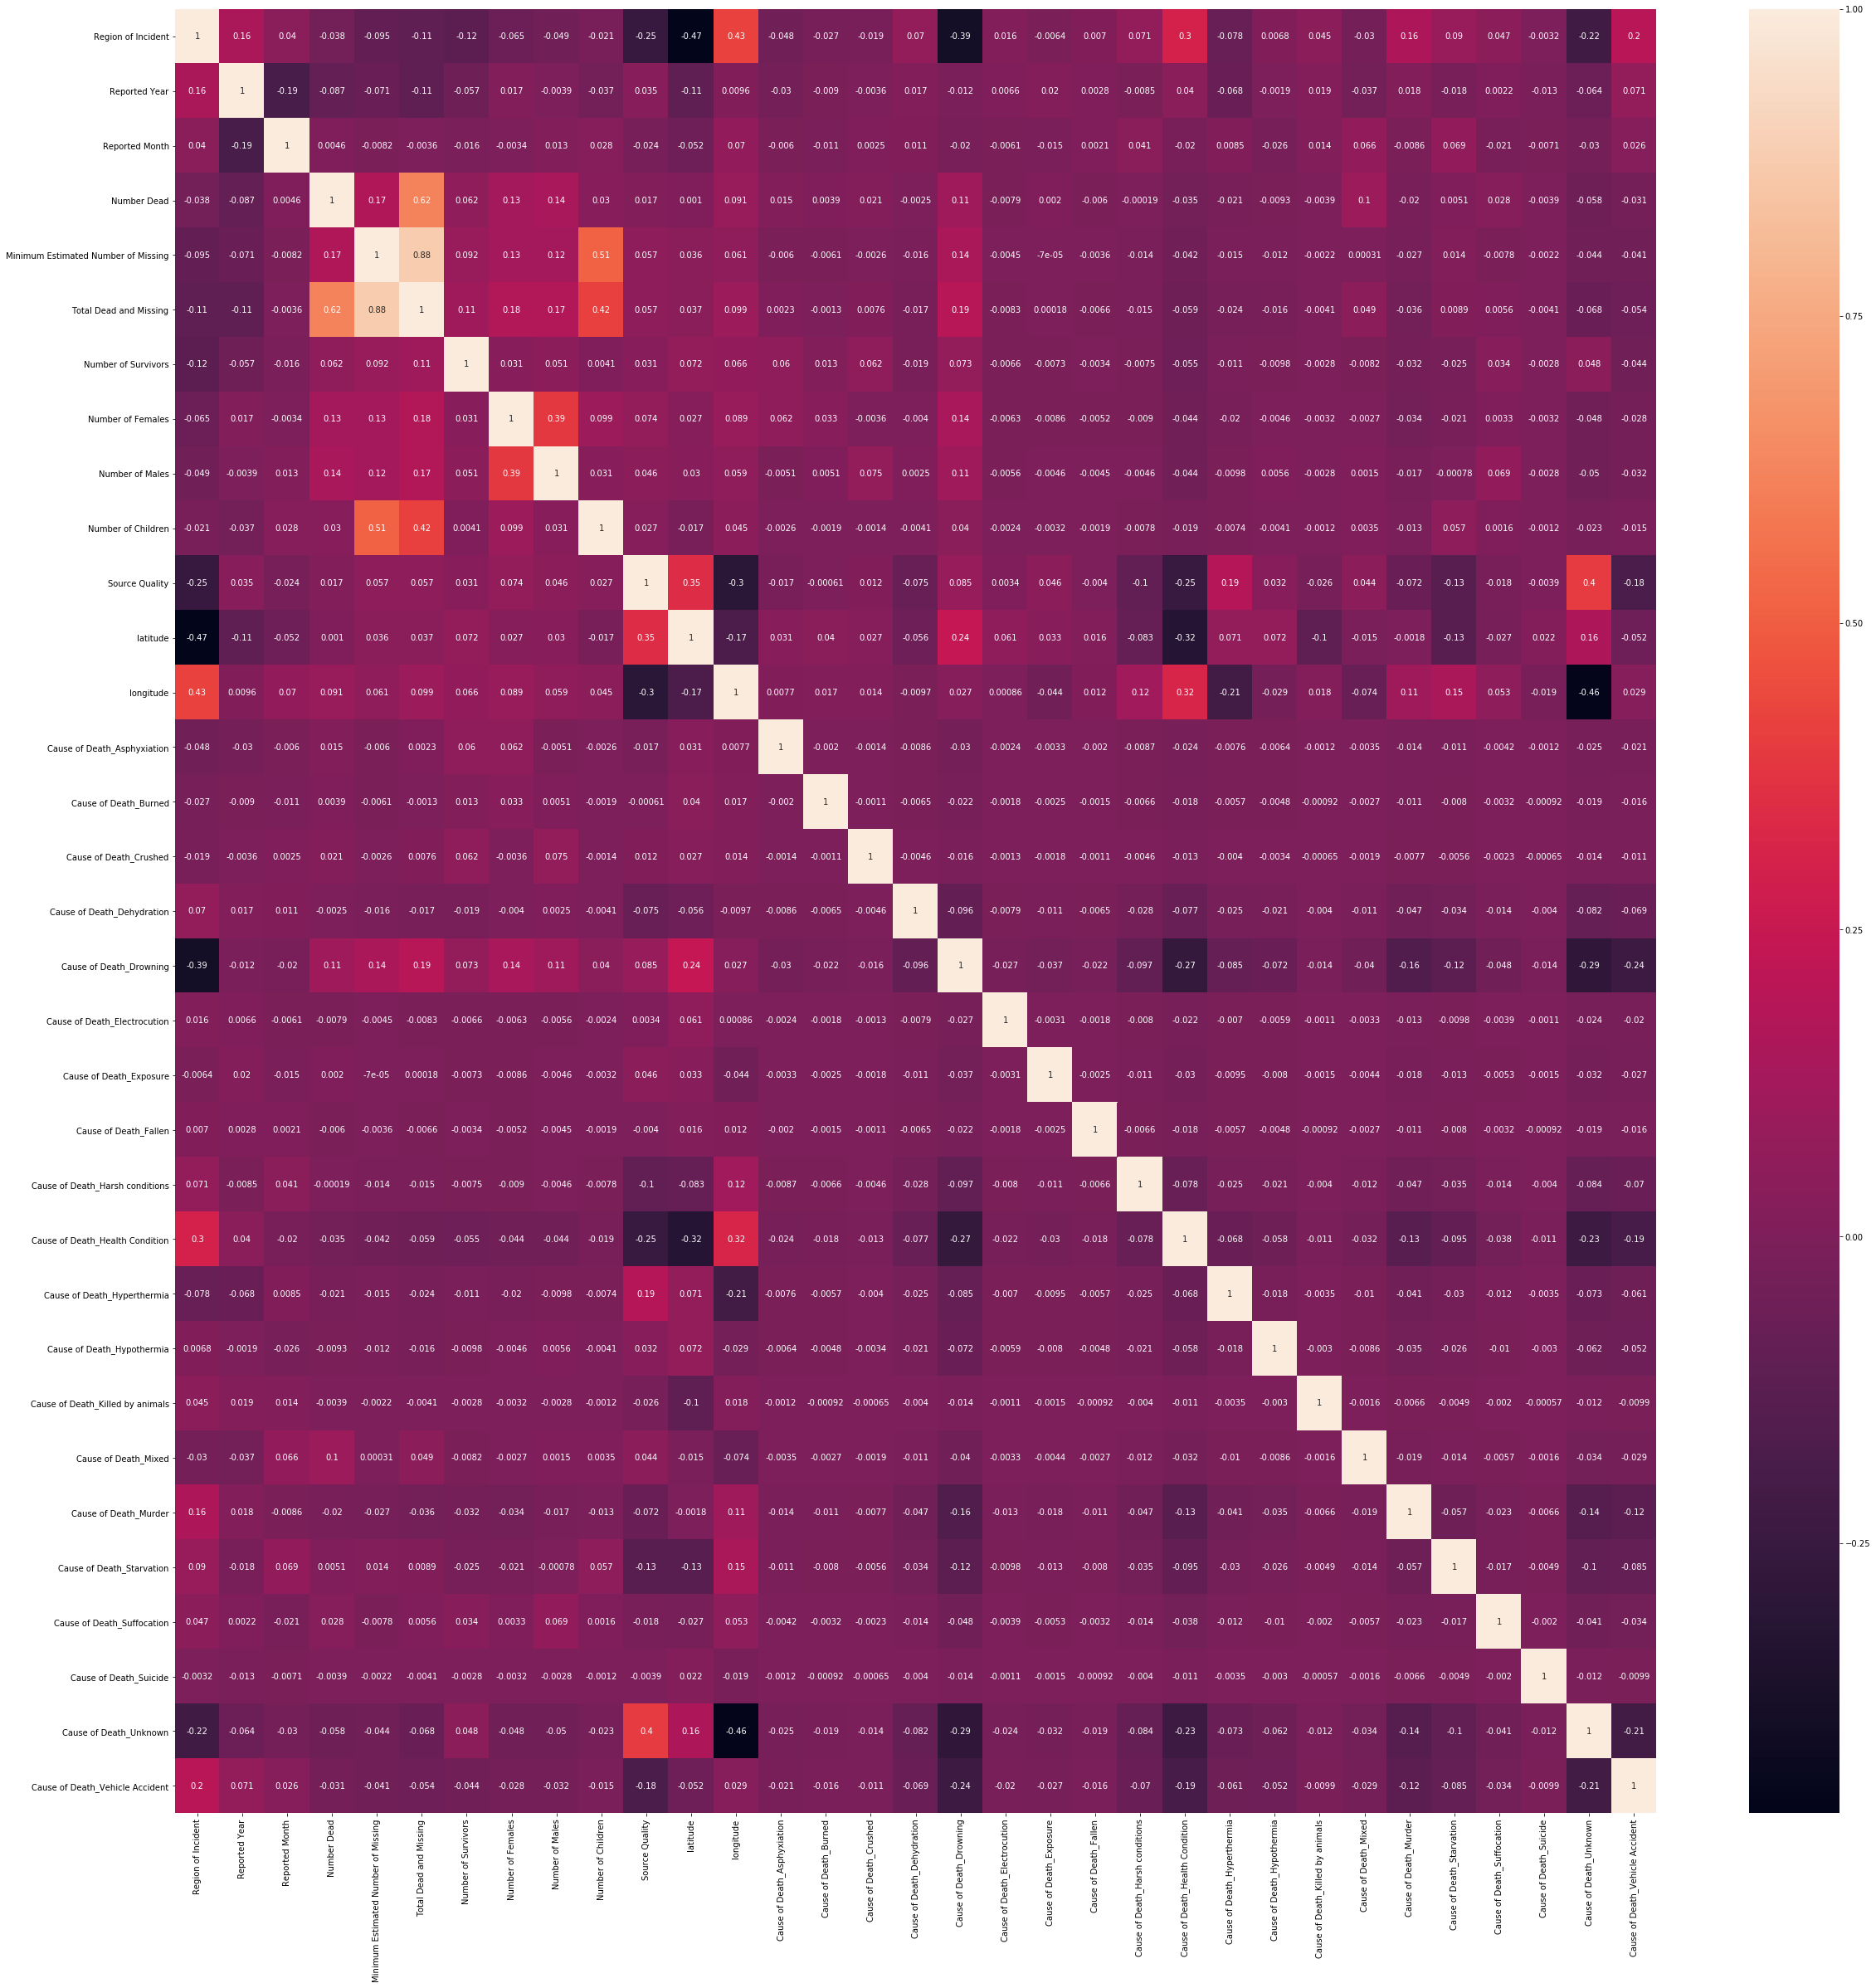

In [46]:
%matplotlib inline
corr = df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr, annot=True)
df.columns

### Run classification models

In [47]:
y=df['Region of Incident']

In [48]:
X=df.loc[:, df.columns != 'Region of Incident']

In [49]:
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,KFold, RandomizedSearchCV
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [50]:
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Logistic Regression 

In [51]:
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# STEP 3: make predictions on the testing set
from sklearn import metrics

y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.8013182674199624


Accuracy of the model is 80%

Confusion Matrix is as below

[[174   0   0   0   7   0   1   0   0   0   0   0]
 [  0  47  12   0   0   0   0   0   0   0   2   0]
 [  0   6 279   0   0   0   0   0   0   0   0   0]
 [  9   0   0   4   5   0   0   0   0   0   0   1]
 [  7   0   0   0 220   0   3   0   0   0   5   0]
 [  0   0  10   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   4   0  29   0   3   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   2   0]
 [  5   0   0   0  16   0   2   0  15   0   0   0]
 [  7   0   0   0  36   0   0   0   0   0  10   0]
 [  0   0   0   0  29   0   0   0   1   1  60   0]
 [  0   0   0   0  11   0   0   0   3   0   0  23]]


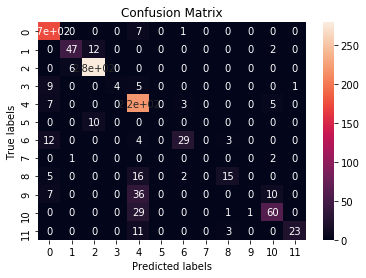

<Figure size 2880x2880 with 0 Axes>

In [53]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
plt.figure(figsize=(40,40))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [54]:
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

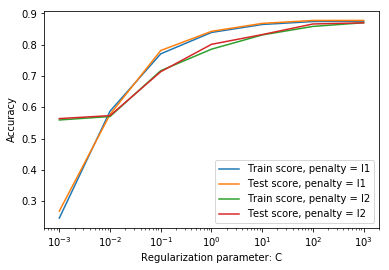

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

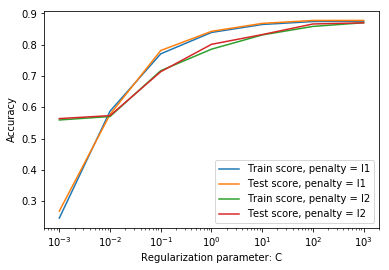

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

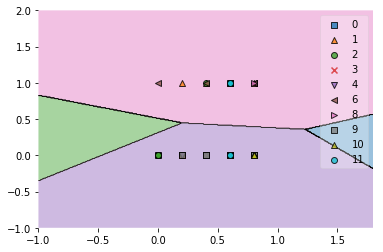

In [57]:
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:100,[0,31]]
y_b = y_train.values[:100]

logistic = LogisticRegression()
logistic.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = logistic)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold

In [59]:
n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

Cross Validation using RepeatedStratifiedKFold and Logistic Regression using Grid search 

In [60]:
#Logistic Regression using Grid search 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
logistic = LogisticRegression(max_iter = 5000)

# Create regularization hyperparameter space
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create hyperparameter options
hyperparameters = dict(C=c_range, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=rskfold, verbose=0)

# Fit grid search
logistic_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', logistic_model.best_estimator_.get_params()['penalty'])
print('Best C:', logistic_model.best_estimator_.get_params()['C'])

# View best Score
print('Best score:', logistic_model.best_score_)
result_logreg = pd.DataFrame(logistic_model.cv_results_)

Best Penalty: l1
Best C: 100
Best score: 0.8602636534839925


In [61]:
score_list_l1 = result_logreg.loc[result_logreg['param_penalty']=='l1', 'mean_test_score']
score_list_l2 = result_logreg.loc[result_logreg['param_penalty']=='l2', 'mean_test_score']

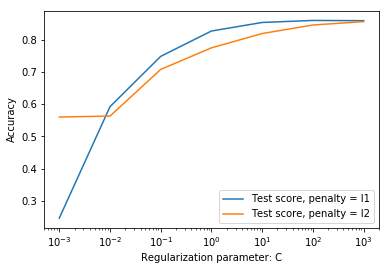

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, score_list_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, score_list_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

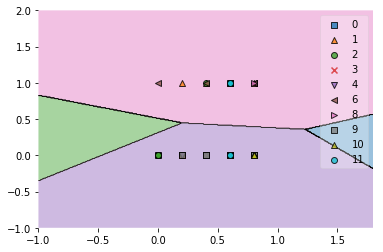

In [63]:
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:100,[0,31]]
y_b = y_train.values[:100]

logistic = LogisticRegression()
logistic.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = logistic)

In [64]:
#conda install -c conda-forge mlxtend

### KNN Classification


In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
train_score_array = []
test_score_array = []
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8681732580037664


Accuracy of the model is 86.81%

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Finding out the best value of K_Neighbour

Text(0, 0.5, 'MSE')

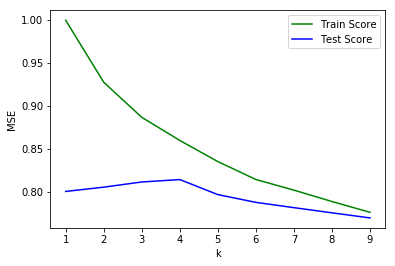

In [68]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

The best value of K is the one where test and Train scores are closer

As per the graph above the closer n_neighbors values would be 7 and 9. 
After running KNN with these values it turns out n_neighbors=7 gives better test and Train score, both of which are approximately 86%.

In [69]:
%matplotlib inline
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8694
Test score: 0.8635


In [70]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

Plotting Confusion matrix

[[174   0   1   0   2   0   4   0   1   0   0   0]
 [  1  50   9   0   0   0   1   0   0   0   0   0]
 [  1  12 271   0   1   0   0   0   0   0   0   0]
 [  0   0   0  15   2   0   0   0   0   2   0   0]
 [  5   1   2   0 217   0   0   0   0   3   7   0]
 [  0   2   7   0   0   1   0   0   0   0   0   0]
 [  7   0   0   0   2   0  34   0   5   0   0   0]
 [  0   2   0   0   1   0   0   0   0   0   0   0]
 [  6   0   0   0   1   0   2   0  28   0   0   1]
 [  1   0   0   0  22   0   0   0   0  29   1   0]
 [  0   0   1   0  11   0   0   0   0   3  76   0]
 [  0   0   0   0  10   0   0   0   0   0   0  27]]


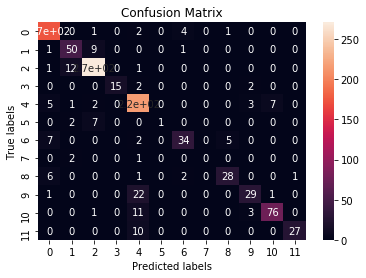

<Figure size 2880x2880 with 0 Axes>

In [71]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
plt.figure(figsize=(40,40))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

Plotting Decision Boundary

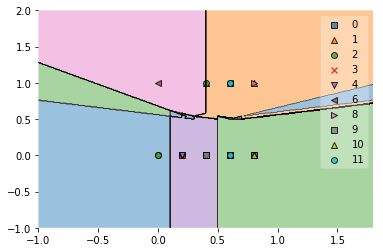

In [72]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[0,31]]
y_b = y_train.values[:50]

knn = KNeighborsClassifier(7)
knn.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = knn)

#KNN Classification using GridSearchCv

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defining the parameter values that should be searched
k_range = list(range(1,15))

# Creating a parameter grid and mapping the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiating a model
knn = KNeighborsClassifier()

# Instantiating the grid
gs = GridSearchCV(knn, param_grid,cv = rskfold,scoring ='accuracy')

# Fitting the grid with data
gs_results = gs.fit(X_train,y_train)

#Printing the best accuracy score and k value
print('Best score:', gs_results.best_score_)
print('Best K:', gs_results.best_params_)

Best score: 0.8649717514124293
Best K: {'n_neighbors': 1}


In [74]:
result = pd.DataFrame(gs_results.cv_results_)
result.head()
score_list= result['mean_test_score']

Text(0, 0.5, 'Test Score')

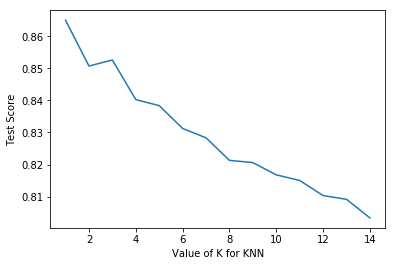

In [75]:
# plot the results k versus grid search score 
plt.plot(k_range, score_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Score')

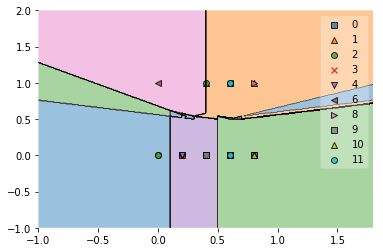

In [76]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[0,31]]
y_b = y_train.values[:50]

knn = KNeighborsClassifier(7)
knn.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = knn)

### Decision Tree

Without Max Depth

In [77]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.962


With Max Depth

In [78]:
%matplotlib inline
dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.978
Accuracy on test set: 0.971


Plotting Confusion matrix

[[180   0   0   0   0   0   1   0   1   0   0   0]
 [  0  58   2   0   0   0   0   1   0   0   0   0]
 [  0   4 281   0   0   0   0   0   0   0   0   0]
 [  0   0   0  19   0   0   0   0   0   0   0   0]
 [  3   0   0   0 226   0   0   0   0   4   2   0]
 [  0   1   0   0   0   9   0   0   0   0   0   0]
 [  1   0   0   0   0   0  47   0   0   0   0   0]
 [  0   1   0   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   1   0  37   0   0   0]
 [  0   0   0   0   7   0   0   0   0  46   0   0]
 [  0   0   0   0   1   0   0   0   0   1  89   0]
 [  0   0   0   0   0   0   0   0   0   0   0  37]]


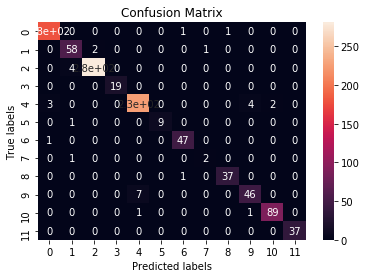

<Figure size 2880x2880 with 0 Axes>

In [79]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
plt.figure(figsize=(40,40))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


Plotting the tree below

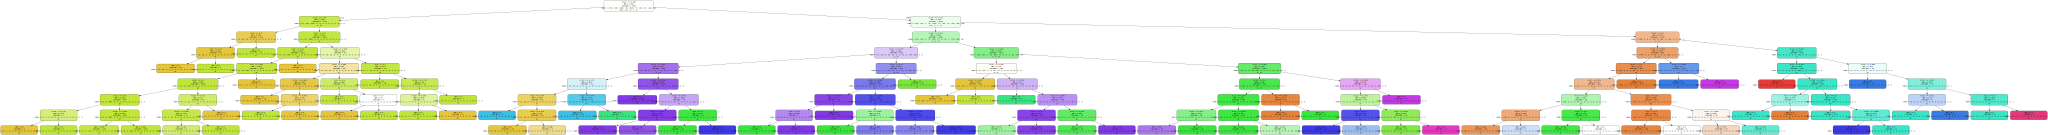

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import os 
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True) 
# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

Plotting Decision Boudary

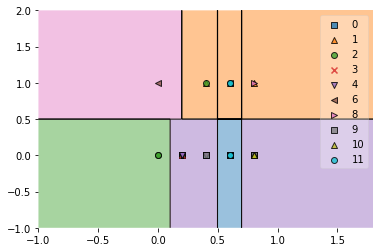

In [81]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[0,31]]
y_b = y_train.values[:50]

dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = dtree)

#DecisionTree with Gridseachcv and cross validation using Kfolds

In [82]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':range(1,10,1)}
dtree = DecisionTreeClassifier()
clf = GridSearchCV(dtree,parameters, cv=rskfold)
grid_dtree = clf.fit(X_train,y_train)

# View best hyperparameters
print('Best Parameters:', grid_dtree.best_params_)

# View best Score
print('Best score:', grid_dtree.best_score_)

Best Parameters: {'max_depth': 9}
Best score: 0.9565442561205273


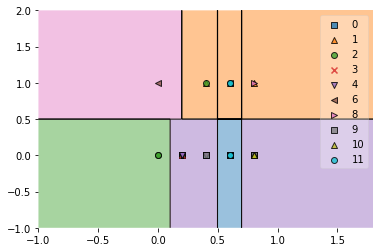

In [83]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[0,31]]
y_b = y_train.values[:50]

dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = dtree)

The best model out of all the models we ran till now, was with decision treaa with maximum accuracy of 97% with max_depth=8 (without grid search). and with grid search it came out to be 95% with max depth being 9 and minimum spit sample 10.


### SVM

In [84]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools


### linear SVM

In [85]:
from sklearn.svm import SVC, LinearSVC
lin_clf = SVC()
lin_clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print(y_pred)

[ 4  2  2 ...  0  2 11]


Plotting Confusion Matrix Below

[[190   0   0   0   4   0   0   0   1   0   0   0   0]
 [  0  54   5   0   0   0   0   0   0   0   0   0   0]
 [  0   3 283   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 226   0   0   0   0   0   5   0   0]
 [  0   1   0   0   0  11   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0  46   0   1   0   0   0   0]
 [  0   1   0   0   0   0   0   3   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  33   0   0   1   0]
 [  0   0   0   0  18   0   0   0   0  31   1   0   0]
 [  0   0   0   0   5   0   0   0   0   1  83   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0  28   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1]]


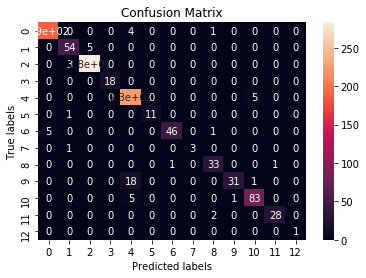

<Figure size 2880x2880 with 0 Axes>

In [87]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('always') 

from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)


ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
plt.figure(figsize=(40,40))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


Classification Report is as below

In [88]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test,y_pred))
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       195
           1       0.92      0.92      0.92        59
           2       0.98      0.99      0.99       286
           3       1.00      1.00      1.00        18
           4       0.89      0.98      0.93       231
           5       1.00      0.92      0.96        12
           6       0.98      0.88      0.93        52
           7       1.00      0.75      0.86         4
           8       0.89      0.94      0.92        35
           9       0.97      0.62      0.76        50
          10       0.93      0.93      0.93        89
          11       0.97      0.93      0.95        30
          12       1.00      1.00      1.00         1

    accuracy                           0.95      1062
   macro avg       0.96      0.91      0.93      1062
weighted avg       0.95      0.95      0.95      1062



0.946642243205435

Linear SVM using Grid Search CV and Cross Validation as 5 folds

**Note: Using 5 fold because K folds was taking too much of a time to run in any of the SVM models

In [89]:
warnings.filterwarnings("ignore")
from sklearn.svm import SVC, LinearSVC

linSVM = LinearSVC()
# Create regularization hyperparameter space
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100,1000]} 

# Create grid search using 5-fold cross validation
clf = GridSearchCV(linSVM, param_grid, cv=5, verbose=0)
# Fit grid search
linSVM_model = clf.fit(X_train, y_train)
# View best hyperparameters
print('Best C:', linSVM_model.best_estimator_.get_params()['C'])
# View best Score
print('Best score:', linSVM_model.best_score_)
result_linSVM = pd.DataFrame(linSVM_model.cv_results_)

Best C: 0.01
Best score: 0.4719868173258004


Text(0, 0.5, 'Test Score')

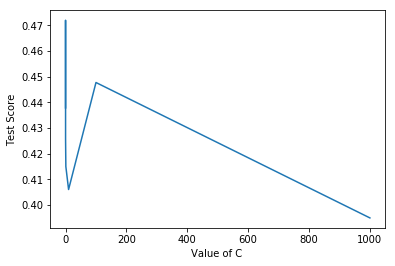

In [90]:
scores_linSVM= result_linSVM['mean_test_score']

# plot the results C versus grid Tets score 
plt.plot(param_grid['C'], scores_linSVM)
plt.xlabel('Value of C ')
plt.ylabel('Test Score')

### Linear Kernel

Kernel= Linear SVM with Gridsearchcv

In [91]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_SVM_lin = grid_search.fit(X_train, y_train)

# View best hyperparameters
print('Best C:', grid_SVM_lin.best_params_)

# View best Score
print('Best score:', grid_SVM_lin.best_score_)
SVM_lin_result = pd.DataFrame(grid_SVM_lin.cv_results_)

Best C: {'C': 1}
Best score: 0.9522128060263654


Text(0, 0.5, 'Test Score')

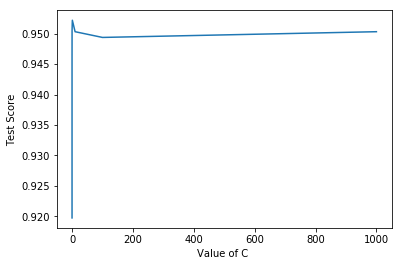

In [92]:
scores_SVM_lin=SVM_lin_result['mean_test_score']

# plot the results C versus grid Tets score 
plt.plot(Cs, scores_SVM_lin)
plt.xlabel('Value of C ')
plt.ylabel('Test Score')

SVC is much slower, especially with lare training set (in our dataframe we have 14 different classes), hence it is not recommended- Referred from Hands-on Machine Learning with Scikit-Learn & TensorFlow (Page 150)

### Polynomia kernel

In [93]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[14 14 14 ... 14 14 14]


Plotting Confusion Matrix Below

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 195]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  59]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 286]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  18]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 231]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  12]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  52]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  35]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  50]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  89]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  30]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


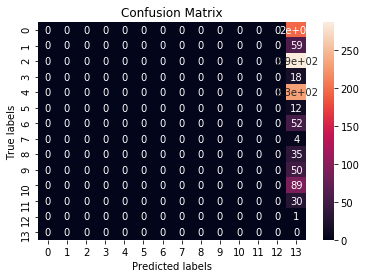

<Figure size 2880x2880 with 0 Axes>

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
plt.figure(figsize=(40,40))

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

Classification Report is as below

In [96]:
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     195.0
           1       0.00      0.00      0.00      59.0
           2       0.00      0.00      0.00     286.0
           3       0.00      0.00      0.00      18.0
           4       0.00      0.00      0.00     231.0
           5       0.00      0.00      0.00      12.0
           6       0.00      0.00      0.00      52.0
           7       0.00      0.00      0.00       4.0
           8       0.00      0.00      0.00      35.0
           9       0.00      0.00      0.00      50.0
          10       0.00      0.00      0.00      89.0
          11       0.00      0.00      0.00      30.0
          12       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0

    accuracy                           0.00    1062.0
   macro avg       0.00      0.00      0.00    1062.0
weighted avg       0.00      0.00      0.00    1062.0



0

Polynomial kernel is not the suitable SVM algorithm for this classification.

### Gaussian Kernel

In [97]:
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [98]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[ 4  2  2 ...  0  2 11]


Plotting Confusion Matrix Below

[[192   0   0   0   3   0   0   0   0   0   0   0   0]
 [  7  49   3   0   0   0   0   0   0   0   0   0   0]
 [  3   0 283   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0  10   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0 219   0   0   0   0   1   2   0   0]
 [  8   0   0   0   0   4   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0  41   0   0   0   0   0   0]
 [  2   1   0   0   0   0   0   1   0   0   0   0   0]
 [  4   0   0   0   0   0   1   0  29   0   0   1   0]
 [  6   0   0   0  14   0   0   0   0  30   0   0   0]
 [ 15   0   0   0   2   0   0   0   0   2  70   0   0]
 [  5   0   0   0   0   0   0   0   1   0   0  24   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]]


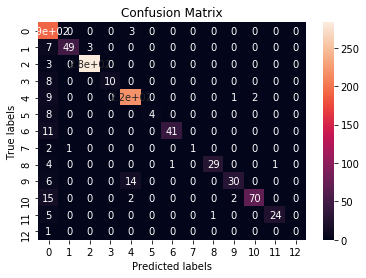

<Figure size 2880x2880 with 0 Axes>

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
plt.figure(figsize=(40,40))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

Classification Report is as below

In [100]:
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82       195
           1       0.98      0.83      0.90        59
           2       0.99      0.99      0.99       286
           3       1.00      0.56      0.71        18
           4       0.92      0.95      0.93       231
           5       1.00      0.33      0.50        12
           6       0.98      0.79      0.87        52
           7       1.00      0.25      0.40         4
           8       0.97      0.83      0.89        35
           9       0.91      0.60      0.72        50
          10       0.97      0.79      0.87        89
          11       0.96      0.80      0.87        30
          12       0.00      0.00      0.00         1

    accuracy                           0.90      1062
   macro avg       0.88      0.67      0.73      1062
weighted avg       0.91      0.90      0.89      1062



0.8946571396613138

Gaussian Kernel using Grid search cv


In [101]:
from sklearn import svm

Cs = [ 0.01, 0.1, 1, 10]
gammas = [ 0.01, 0.1, 1, 10 ]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=10)
grid_SVM_RBF = grid_search.fit(X, y)

# View best hyperparameters
print('Best Parameters:', grid_SVM_RBF.best_params_)

# View best Score
print('Best score:', grid_SVM_RBF.best_score_)
result_SVM_RBF = pd.DataFrame(grid_SVM_RBF.cv_results_)

Best Parameters: {'C': 10, 'gamma': 0.01}
Best score: 0.9248587570621469


### Sigmoid Kernel

In [102]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [103]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[2 2 2 ... 2 2 2]


Plotting Confusion Matrix Below

[[  0   0 195   0   0   0   0   0   0   0   0   0   0]
 [  0   0  59   0   0   0   0   0   0   0   0   0   0]
 [  0   0 286   0   0   0   0   0   0   0   0   0   0]
 [  0   0  18   0   0   0   0   0   0   0   0   0   0]
 [  0   0 231   0   0   0   0   0   0   0   0   0   0]
 [  0   0  12   0   0   0   0   0   0   0   0   0   0]
 [  0   0  52   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   0   0   0   0   0   0   0   0   0   0]
 [  0   0  35   0   0   0   0   0   0   0   0   0   0]
 [  0   0  50   0   0   0   0   0   0   0   0   0   0]
 [  0   0  89   0   0   0   0   0   0   0   0   0   0]
 [  0   0  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0]]


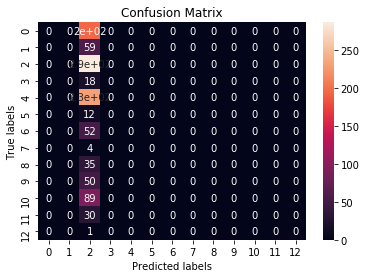

<Figure size 2880x2880 with 0 Axes>

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
plt.figure(figsize=(40,40))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

Classification Report is as below

In [105]:
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       0.00      0.00      0.00        59
           2       0.27      1.00      0.42       286
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00       231
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        52
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00        50
          10       0.00      0.00      0.00        89
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00         1

    accuracy                           0.27      1062
   macro avg       0.02      0.08      0.03      1062
weighted avg       0.07      0.27      0.11      1062



0.42433234421364985

**Comparison of Kernel Performance

If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had 14 output classes.

Polynomial kernel is not the suitable SVM algorithm for this classification.

Gaussian kernel ,we can see that Gaussian kernel achieved a perfect 90% prediction rate while linear classification achieved 93% prediction rate. 
Therefore the Linear kernel performed slightly better. 

However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.

Comparing All Models:

Test Score of each model:

    logistic 0.8602636534839925
    knn: 0.8649717514124293
    Decision Tree: 0.9567325800376648
    Linear SVM:0.946642243205435
    Linear Kernel:0.9522128060263654
    Polynomia kernel: Not a suitable model for this dataset
    Gaussian Kernel: 0.9248587570621469
    Sigmoid Kernel: 0.42433234421364985


Out of all the models, we can see that Decision tree gives best output of all

**References:


1. O'reilly Hands-on Machine Learning with Scikit-Learn & TensorFlow by Aurelieb Geron
2. https://www.kaggle.com/
3. Git Hut Machine Learning projects
4. StackOverflow.com